## Because of a recent class I took on macroeconomics, I'm interested in examining relationships between several key economic variables: GDP, Consumption, Investment, Government, Exports, and Imports. In theory, these variables are related by the equation: GDP = C + I + G + E - I. I wish to test this relationship empiracally. I begin by importing data on each of these variables using FRED.com

In [53]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 1, 1)

# get data from FRED. 

# quarterly data
FRED_df = web.DataReader(["GDPC1", "PCECC96", "GPDIC1", "GCEC1", "EXPGSC1", "IMPGSC1"] , "fred", start, end)   
FRED_df.columns = ['GDP', 'Consumption', 'Investment', 'Government', 'Exports', 'Imports']

## Let's examine our dataset.

In [54]:
FRED_df

,GDP,Consumption,Investment,Government,Exports,Imports
DATE,,,,,,
1960-01-01,3123.162,1876.347,397.964,985.207,101.064,125.380
1960-04-01,3111.310,1900.059,360.873,995.833,107.484,126.322
1960-07-01,3119.057,1892.452,359.955,1020.016,104.769,122.605
1960-10-01,3081.300,1894.944,320.079,1026.824,106.940,116.822
1961-01-01,3102.251,1894.409,328.386,1041.989,106.207,116.254
1961-04-01,3159.918,1922.639,351.395,1044.388,104.732,117.671
1961-07-01,3212.606,1931.998,378.713,1066.389,104.163,125.463
1961-10-01,3277.717,1970.746,384.980,1089.696,107.384,128.446
1962-01-01,3336.753,1991.679,405.737,1110.693,107.121,132.357


In [55]:
FRED_df.describe()

,GDP,Consumption,Investment,Government,Exports,Imports
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,8860.871226,5742.755452,1376.793136,2033.534697,747.575231,962.321561
std,4043.704525,2832.575672,766.306451,625.574920,609.013995,810.338734
min,3081.300000,1876.347000,320.079000,985.207000,101.064000,116.254000
25%,5378.679000,3337.864000,722.434000,1477.236000,253.687000,298.823000
50%,8158.035000,5228.524000,1174.583000,2067.686000,466.872000,648.334000
75%,12679.338000,8340.761000,2185.703000,2594.584000,1172.095000,1719.607000
max,16349.970000,11145.286000,2905.429000,3112.999000,2150.796000,2650.521000


## All of the variables appear to be well behaved and seem to roughly fit the theoretical equation relating them: Y = C + I + G + E - I. By creating a box plot, we better see that there are no outliers to be concerned about. Furthermore, this dataset has no missing values.

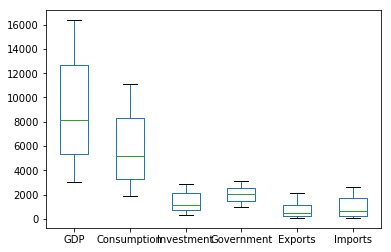

In [56]:
%matplotlib inline
box = FRED_df.plot(kind="box")

In [57]:
FRED_df.columns[FRED_df.isnull().any()]

Index([], dtype='object')

In [58]:
FRED_df.corr()

,GDP,Consumption,Investment,Government,Exports,Imports
GDP,1.000000,0.999203,0.979495,0.986198,0.976364,0.979620
Consumption,0.999203,1.000000,0.976588,0.984100,0.980140,0.984556
Investment,0.979495,0.976588,1.000000,0.947669,0.948939,0.972216
Government,0.986198,0.984100,0.947669,1.000000,0.944511,0.949240
Exports,0.976364,0.980140,0.948939,0.944511,1.000000,0.985702
Imports,0.979620,0.984556,0.972216,0.949240,0.985702,1.000000


## The correlations between the variables appear to be as expected. All are extremely correlated with each other, which seems to fit the predictions of theory. I now create a variable to better examine this relationship. 

In [61]:
FRED_df['Resid'] = FRED_df['GDP'] - FRED_df['Consumption'] - FRED_df['Investment'] - FRED_df['Government'] \
    - FRED_df['Exports'] + FRED_df['Imports']

In [62]:
FRED_df

,GDP,Consumption,Investment,Government,Exports,Imports,Resid
DATE,,,,,,,
1960-01-01,3123.162,1876.347,397.964,985.207,101.064,125.380,-112.040
1960-04-01,3111.310,1900.059,360.873,995.833,107.484,126.322,-126.617
1960-07-01,3119.057,1892.452,359.955,1020.016,104.769,122.605,-135.530
1960-10-01,3081.300,1894.944,320.079,1026.824,106.940,116.822,-150.665
1961-01-01,3102.251,1894.409,328.386,1041.989,106.207,116.254,-152.486
1961-04-01,3159.918,1922.639,351.395,1044.388,104.732,117.671,-145.565
1961-07-01,3212.606,1931.998,378.713,1066.389,104.163,125.463,-143.194
1961-10-01,3277.717,1970.746,384.980,1089.696,107.384,128.446,-146.643
1962-01-01,3336.753,1991.679,405.737,1110.693,107.121,132.357,-146.120


In [63]:
FRED_df.describe()

,GDP,Consumption,Investment,Government,Exports,Imports,Resid
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,8860.871226,5742.755452,1376.793136,2033.534697,747.575231,962.321561,-77.465729
std,4043.704525,2832.575672,766.306451,625.574920,609.013995,810.338734,52.890864
min,3081.300000,1876.347000,320.079000,985.207000,101.064000,116.254000,-175.383000
25%,5378.679000,3337.864000,722.434000,1477.236000,253.687000,298.823000,-119.999000
50%,8158.035000,5228.524000,1174.583000,2067.686000,466.872000,648.334000,-83.431000
75%,12679.338000,8340.761000,2185.703000,2594.584000,1172.095000,1719.607000,-24.441000
max,16349.970000,11145.286000,2905.429000,3112.999000,2150.796000,2650.521000,2.578000


## By examining the Resid variable, it seems the theoretical equation nearly always underestimates GDP. To further understand this variable, we create a line graph to see how it, and the other key variables, vary over time. 

In [69]:
FRED_df = FRED_df.reset_index()

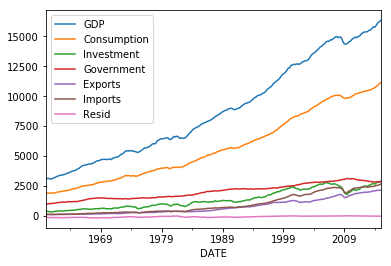

In [71]:
import matplotlib.pyplot as plt
FRED_df.plot.line("DATE", ["GDP", "Consumption", "Investment", "Government", "Exports", "Imports", "Resid"])
plt.show()